In [1]:
%load ImportsDefinitions.py


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexi

In [2]:
#pairnoume to dataset me 50000 stixous to opoio den periexei synaishtimatiko skor
path='songdata.csv'
data = pd.read_csv(path)
all_texts=data.text
text_samples1=data.text
print("Τα NULL δεδομένα στο dataset μας είναι: {}".format(text_samples1.isnull().sum()))
print("Κάνουμε προεπισκόπηση των δεδομένων μας:")
#text_samples=text_samples1.sample(100,random_state=1) # pairnoume ena tyxaio deigma apo ta sample mas
text_samples=text_samples1

print("Έχουμε {} διαφορετικά τραγούδια".format(text_samples.count()))
print(text_samples.head(10))

Τα NULL δεδομένα στο dataset μας είναι: 0
Κάνουμε προεπισκόπηση των δεδομένων μας:
Έχουμε 57650 διαφορετικά τραγούδια
0    Look at her face, it's a wonderful face  \nAnd...
1    Take it easy with me, please  \nTouch me gentl...
2    I'll never know why I had to go  \nWhy I had t...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
5    Well, you hoot and you holler and you make me ...
6    Down in the street they're all singing and sho...
7    Chiquitita, tell me what's wrong  \nYou're enc...
8    I was out with the morning sun  \nCouldn't sle...
9    I'm waitin' for you baby  \nI'm sitting all al...
Name: text, dtype: object


In [5]:
#PREPROCESSING KAI YLOPOIISI  SYNAISTHIMATIKHS ANALYSIS me SENTIWORDNET
#kanoume tokenize tis lekseis
my_sentiments_class=SentimentAnalysis_Sentiwordnet(text_samples)  

57650


In [3]:
saveList(my_sentiments_class,"my_sentiments_class.txt")
#my_sentiments_class=loadList("my_sentiments_class.txt.npy")


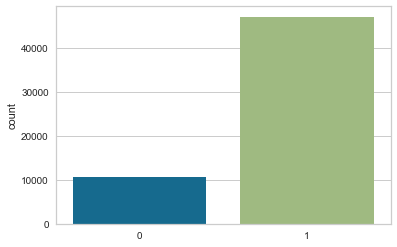

Έχουμε 47095 χαρούμενα τραγούδια
Έχουμε 10555 στενάχωρα τραγούδια


In [4]:
sns.countplot(my_sentiments_class,label="Count")
plt.show()
print("Έχουμε {} χαρούμενα τραγούδια".format(my_sentiments_class.count(1)))
print("Έχουμε {} στενάχωρα τραγούδια".format(my_sentiments_class.count(0)))


In [5]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(text_samples, my_sentiments_class,test_size=0.2,random_state=1)

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΧΩΡΙΣ ΤΟΚΕΝΙΖΕR
Number of features: 73880
to accuracy tou CountVectorizer me NB einai: 0.8073934933150149


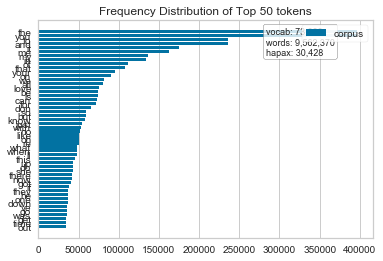

Number of features: 73880
to accuracy tou TFIDF me NB einai 0.8149826513687691


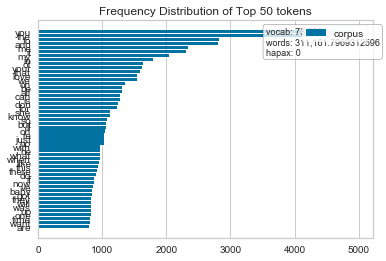

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΜΕ ΤΟΚΕΝΙΖΕR
Number of features: 72672
to accuracy tou CountVectorizer me NB einai: 0.8197527259160483


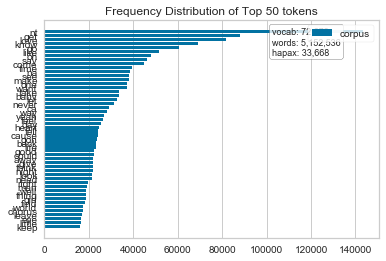

Number of features: 72672
to accuracy tou TFIDF me NB einai 0.8150043376967286


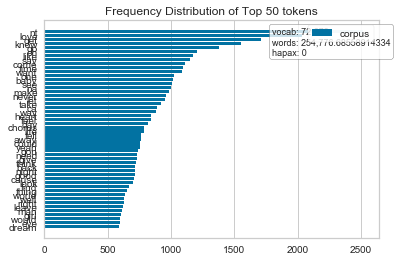

In [7]:
#αξιολόγηση CountVect kai TFIDF gia synaisthimatikh analysh me SentiWordNet

token_iser='0'
scores=[]

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΧΩΡΙΣ ΤΟΚΕΝΙΖΕR")
scores.append(countvect_test_simple(X_train_s,X_test_s,y_train_s,y_test_s,token_iser))
scores.append(tfidf_test_simple(X_train_s,X_test_s,y_train_s,y_test_s,token_iser))

token_iser='1'

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από SentiWordNet ΜΕ ΤΟΚΕΝΙΖΕR")
scores.append(countvect_test_simple(X_train_s,X_test_s,y_train_s,y_test_s,token_iser))
scores.append(tfidf_test_simple(X_train_s,X_test_s,y_train_s,y_test_s,token_iser))



In [10]:
# DataFrame Vectorizer Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec without tokenizer','tvec without tokenizer','cvec with tokenizer','tvect with tokenizer']
acc_df['scores']= scores
acc_df

,params,scores
0,cvec without tokenizer,0.807393
1,tvec without tokenizer,0.814983
2,cvec with tokenizer,0.819753
3,tvect with tokenizer,0.815004


In [11]:
#parametropoihsh vectorizer
ngrams=[1,2,3,4]
mdf_params = [0.25, 0.5, 0.75, 1.0]
maxfeat=[5000,20000,50000,100000,None]

#θα υλοποιησουμε διαφορετικους count vectorizers με logreg για να βρουμε την καλυτερη επιδοση
#θα ορισουμε τις λιστες στις οποιες θα αποθηκευσουμε τα αποτελεσματα
ngram_scores=[]
mdf_scores=[]
maxfeat_scores=[]


token_izer='1'

for mf in maxfeat:
    maxfeat_scores.append(countvect_test_maxfeat(X_train_s,X_test_s,y_train_s,y_test_s,token_izer,mf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: {}".format(maxfeat_scores))

for mdf in mdf_params:
    mdf_scores.append(countvect_test_maxdf(X_train_s,X_test_s,y_train_s,y_test_s,token_izer,mdf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max DF ειναι: {}".format(mdf_scores))
for n in ngrams:
    ngram_scores.append(countvect_test_ngrams(X_train_s,X_test_s,y_train_s,y_test_s,token_izer,n))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά n-grams ειναι: {}".format(ngram_scores))


Number of features: 5000
To accuracy NB me max features 5000 είναι : [0.8189229  0.81656548 0.81630529 0.81568219] 
Number of features: 20000
To accuracy NB me max features 20000 είναι : [0.81293903 0.80832611 0.80537728 0.8074421 ] 
Number of features: 50000
To accuracy NB me max features 50000 είναι : [0.81805568 0.81162186 0.81040763 0.81342701] 
Number of features: 72672
To accuracy NB me max features 100000 είναι : [0.82360593 0.82003469 0.8160451  0.81932518] 
Number of features: 72672
To accuracy NB me max features None είναι : [0.82360593 0.82003469 0.8160451  0.81932518] 
Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: [0.816868967027087, 0.8085211297282874, 0.8133780436108878, 0.8197527259160483, 0.8197527259160483]
Number of features: 72650
To accuracy NB me Max df: 0.25 είναι : [0.82360593 0.81760624 0.81084128 0.81811085] 
Number of features: 72670
To accuracy NB me Max df: 0.5 είναι : [0.82586072 0.82072853 0.81760624 0.82192731] 
Number

   params    scores
0       1  0.819753
1       2  0.818604
2       3  0.804987
3       4  0.753838


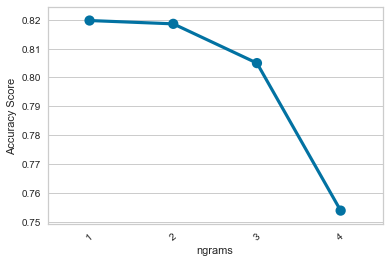

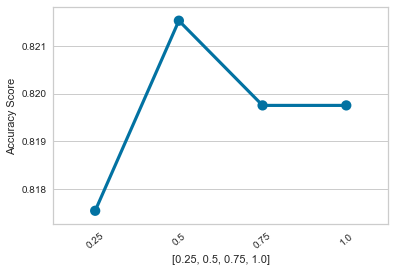

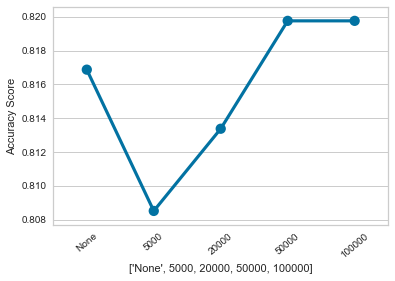

In [12]:
ngrams=[1,2,3,4]
ngram_params = ['cvec gram_1','cvec gram_2','cvec gram_3','cvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])
print(ngram_df)
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά n-grams είναι")
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

mdf_params = [0.25, 0.5, 0.75, 1.0]
maxdf_df = pd.DataFrame({'params':mdf_params, 'scores':mdf_scores}, index=[0,1,2,3])
# adding cvec score with default params
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
print("Τα αποτελέσματα για τα διαφορετικά max df είναι")
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxdf_df)
plt.ylabel('Accuracy Score')
plt.xlabel(mdf_params)
plt.xticks(rotation=40)
plt.show()

maxfeat=['None',5000,20000,50000,100000]
maxfeat_df = pd.DataFrame({'params':maxfeat, 'scores':maxfeat_scores}, index=[0,1,2,3,4])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max features είναι")

#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxfeat_df)
plt.ylabel('Accuracy Score')
plt.xlabel(maxfeat)
plt.xticks(rotation=40)
plt.show()

In [13]:
print(max(maxfeat_scores))#Βλέπουμε ότι το καλύτερο score είναι με max_df=0.5
print(max(ngram_scores))
print(max(mdf_scores))

0.8197527259160483
0.8197527259160483
0.82153070395903


In [7]:
#δοκιμαζουμε με τον καλυτερο vectorizer διαφορετικους classifiers
# initalise the vectoriser 
cvec = CountVectorizer(tokenizer=tokenizer_preproccessor,max_df=0.5)
# fit the training data on the model
cvec.fit(X_train_s)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train_s)
X_test_cvec=cvec.transform(X_test_s)
#print(X_train_tvec)

In [18]:
#δοκιμαζουμε διαφορετικούς classifiers
classifier_finder(X_train_cvec,X_test_cvec,y_train_s,y_test_s)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Η επιτυχία του  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.9219645168437871
Η επιτυχία του  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) είναι:  0.8163479606514983
Η επιτυχία του  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.8231138904164318


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Η επιτυχία του  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) είναι:  0.8338897836317578


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Η επιτυχία του  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) είναι:  0.9037728750037083
                    params    scores
0     Logistisc Regression  0.921965
1  Multinomial Naive Bayes  0.816348
2            Decision Tree  0.823114
3            Random Forest  0.833890
4               Linear SVC  0.903773


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
# Grid search me cross validation
grid={"C":np.logspace(-2,2,5), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=5)
logreg_cv.fit(X_train_cvec,y_train_s)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=0.01, penalty=l1, score=0.9080858443529157, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ..... C=0.01, penalty=l1, score=0.9067851723390419, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ..... C=0.01, penalty=l1, score=0.9080858443529157, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ..... C=0.01, penalty=l1, score=0.9052677216561891, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s


[CV] ..... C=0.01, penalty=l1, score=0.9030999349663993, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9056603773584906, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.8974192149208414, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9080459770114943, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9052266319670353, total=   0.6s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.9008891780524831, total=   0.6s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.9219596791675699, total=   3.6s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.9256449165402124, total=  16.5s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1.0, penalty=l2, score=0.929330153912855, total=  12.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.9252113592022545, total=  18.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.9226100151745068, total=  15.5s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.9271623672230652, total=  13.8s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.9240945564953372, total=  26.5s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ........ C=1.0, penalty=l2, score=0.92474517458252, total=  16.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.9240945564953372, total=  16.7s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.9245283018867925, total=  25.6s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.9219258295380611, total=  22.0s
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9113375243876003, total=26.6min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10.0, penalty=l1, score=0.905484500325168, total=19.9min
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.9117710817255582, total=   5.3s
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9074355083459787, total=20.0min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9130717537394321, total=19.5min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9112990674474084, total=19.9min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10.0, penalty=l1, score=0.912600303621774, total=19.8min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9052266319670353, total=19.9min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9171546302320538, total=24.9min
[CV] C=10.0, penalty=l1 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l1, score=0.9052266319670353, total=28.2min
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9256449165402124, total=  20.0s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10.0, penalty=l2, score=0.929546932581834, total=  15.7s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9247778018642966, total=  22.1s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9202254498157382, total=  21.0s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9221764578365489, total=  25.1s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9262632834526133, total=  20.6s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9243114291910648, total=  18.7s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9201908479722403, total=  23.6s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9284320104098894, total=  19.4s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.9238776837996097, total=  23.3s
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8887925428137872, total=30.0min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100.0, penalty=l1, score=0.882722740082376, total=30.0min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8900932148276609, total=30.5min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8913938868415348, total=33.2min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8859744201170605, total=26.0min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8887443070917371, total=26.2min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100.0, penalty=l1, score=0.890479288657558, total=24.3min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8811537627412709, total=26.0min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l1, score=0.8893949251789199, total=34.5min
[CV] C=100.0, penalty=l1 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100.0, penalty=l1, score=0.891563652136196, total=35.0min
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9256449165402124, total=  20.8s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100.0, penalty=l2, score=0.928896596574897, total=  17.3s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9243442445263386, total=  22.9s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9204422284847171, total=  23.1s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9219596791675699, total=  27.8s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9238776837996097, total=  29.7s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9223595749295164, total=  22.4s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9223595749295164, total=  22.7s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100.0, penalty=l2, score=0.9277813923227066, total=  24.6s
[CV] C=100.0, penalty=l2 .............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 508.0min finished


[CV] .... C=100.0, penalty=l2, score=0.9234439384081544, total=  28.3s
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.932827406764961


In [8]:
best_clf_sentiwordnet = LogisticRegression(**logreg_cv.best_params_)
#best_clf_sentiwordnet=LogisticRegression(C=0.1,penalty='l1')
best_clf_sentiwordnet.fit(X_train_cvec,y_train_s)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
#σωζουμε τα test sets, τον best_clf_sentiwordnet και τον vectorizer
saveList(X_test_s,"X_test_sentiwordnet.npy")
saveList(y_test_s,"y_test_sentiwordnet.npy")


saveList(X_test_cvec,"X_test_sentiwordnet_dtm")
joblib.dump(best_clf_sentiwordnet, 'sentiwordnet_clf.pkl')
joblib.dump(cvec, 'sentiwordnet_cvec.pkl')

Saved successfully!
Saved successfully!
Saved successfully!


['sentiwordnet_cvec.pkl']